<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

# Чтение файла

df = pd.read_csv("/content/OnlineRetail.csv", error_bad_lines=False, encoding='latin1')
#Пришлось покапаться в интернете, дабы обойти ошибку(в n строке ожидалось увидеть 8 полей, а нашлось 13). Кодом после названия  датафрейма, мы сделали так, что таблица будет создана на основе первой строки и все, что не подойдет под ее формат будет опущено.
#Так же я использовала кодировку latin1 для чтения этого файла, поскольку в этом файле, возможно, есть некоторые специальные символы, опять же воспользовалась помощью паутины, чтобы вывести хоть что-то, и это помогло :)
df

<ipython-input-1-2e22fcedbd16>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/OnlineRetail.csv", error_bad_lines=False, encoding='latin1')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
49440,540516,22824,3 TIER SWEETHEART GARDEN SHELF,1,09-01-2011 12:01,35.95,16326.0,United Kingdom
49441,540516,21232,STRAWBERRY CERAMIC TRINKET BOX,1,09-01-2011 12:01,1.25,16326.0,United Kingdom
49442,540516,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,1,09-01-2011 12:01,1.25,16326.0,United Kingdom
49443,540516,22178,VICTORIAN GLASS HANGING T-LIGHT,6,09-01-2011 12:01,1.25,16326.0,United Kingdom


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    49445 non-null  object 
 1   StockCode    49445 non-null  object 
 2   Description  49303 non-null  object 
 3   Quantity     49445 non-null  int64  
 4   InvoiceDate  49445 non-null  object 
 5   UnitPrice    49445 non-null  float64
 6   CustomerID   31563 non-null  float64
 7   Country      49444 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [3]:
df_cluster = df.copy()

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_features = df_cluster.select_dtypes(include=['int']).columns

In [5]:
standard_scaler = StandardScaler()
st_scaler = df_cluster.copy()
st_scaler[num_features] = standard_scaler.fit_transform(df_cluster[num_features])
st_scaler["UnitPrice"].unique()

array([2.550000e+00, 3.390000e+00, 2.750000e+00, 7.650000e+00,
       4.250000e+00, 1.850000e+00, 1.690000e+00, 2.100000e+00,
       3.750000e+00, 1.650000e+00, 4.950000e+00, 9.950000e+00,
       5.950000e+00, 7.950000e+00, 8.500000e-01, 6.500000e-01,
       1.250000e+00, 2.950000e+00, 1.950000e+00, 4.200000e-01,
       1.800000e+01, 1.060000e+00, 6.950000e+00, 1.095000e+01,
       3.450000e+00, 5.500000e-01, 3.800000e-01, 1.450000e+00,
       3.950000e+00, 6.750000e+00, 2.750000e+01, 1.495000e+01,
       1.695000e+01, 4.650000e+00, 6.450000e+00, 1.275000e+01,
       1.995000e+01, 8.500000e+00, 3.820000e+00, 3.370000e+00,
       5.450000e+00, 6.350000e+00, 7.200000e-01, 6.400000e-01,
       1.000000e-01, 3.200000e-01, 1.480000e+00, 2.900000e-01,
       1.650000e+02, 3.575000e+01, 3.350000e+00, 1.065000e+01,
       1.500000e+01, 9.500000e-01, 2.100000e-01, 1.200000e-01,
       0.000000e+00, 2.400000e-01, 3.250000e+00, 1.490000e+00,
       2.250000e+00, 1.550000e+00, 1.895000e+01, 8.9500

In [6]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["CustomerID"].unique()

array([17850., 13047., 12583., ..., 17114., 15059., 16326.])

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

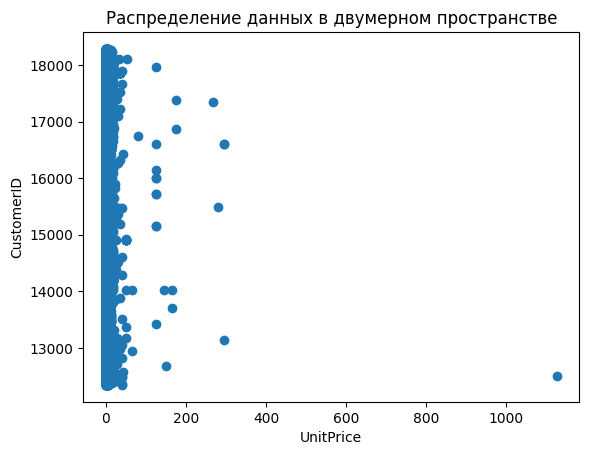

In [7]:
plt.scatter(df["UnitPrice"], df["CustomerID"])
plt.xlabel('UnitPrice')
plt.ylabel('CustomerID')
plt.title('Распределение данных в двумерном пространстве')

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [10]:
X = df[["UnitPrice", "CustomerID"]]
X

,UnitPrice,CustomerID
0,2.55,17850.0
1,3.39,17850.0
2,2.75,17850.0
3,3.39,17850.0
4,3.39,17850.0
...,...,...
49440,35.95,16326.0
49441,1.25,16326.0
49442,1.25,16326.0
49443,1.25,16326.0


In [13]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_



NameError: ignored

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here